In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ape import accounts, chain, Contract, networks, project

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# mrgl v1 constants
MAINTENANCE_UNIT = int(1e6)
SECONDS_AGO = 43200  # 12 hr TWAP

In [5]:
FILEPATH = "results/MarginalV1LPRunner_0x1d42064Fc4Beb5F8aAF85F4617AE8b3b5B8Bd801_250000_0.25_0.25_3.5_0_50400_0.005_17998181_19311400_2400.csv"

In [6]:
[
    _,
    pool_addr,
    maintenance,
    utilization,
    skew,
    leverage,
    rel_margin_above_safe_min,
    blocks_held,
    sqrt_price_tol,
    start,
    stop,
    step
] = re.split("_", FILEPATH[len("results/"):-len(".csv")])

In [7]:
maintenance = int(maintenance)
utilization = float(utilization)
skew = float(skew)
leverage = float(leverage)
rel_margin_above_safe_min = float(rel_margin_above_safe_min)
blocks_held = int(blocks_held)
sqrt_price_tol = float(sqrt_price_tol)
start = int(start)
stop = int(stop)
step = int(step)

In [8]:
leverage

3.5

In [9]:
# values array from backtester for marginal LP pool
# values = [liquidity, sqrtPriceX96, liquidityLocked, lpTotalLiquidity, lpAmount0, lpAmount1]
df = pd.read_csv(FILEPATH)
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,_net_liquidity_liquidated_cumulative0,_net_liquidity_liquidated_cumulative1,_net_liquidity_settled_cumulative0,_net_liquidity_settled_cumulative1,_balances_pool0,_balances_pool1,_last_mrglv1_block_timestamp,_last_mrglv1_tick_cumulative,_net_liquidity_swap_fees_cumulative,_net_liquidity_position_fees_cumulative
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,-1,-1,0,0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,0,0,194065277576750292549332,552889053808695116370,1708998587,-236748,56581701727828008,327866112482406212
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,0,0,194065277576750292549332,552891073624321598797,1709027523,-1704653906,75780139533276148,327866112482406212
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,0,0,192985096945523816945434,555916722557499230723,1709056460,-3409129439,210876281777339797,327866112482406212
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,0,0,192985096945523816945434,555931596164344408800,1709085432,-5111349957,351199376858293113,327866112482406212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,234087237071982364276301,906808341660800536817,1724752466,-932573553147,3554834574229818879934,10803464094282245086
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,234087237071982364276301,908069208032173492635,1724781439,-934187635858,3565047274477380229382,10803464094282245086
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,241217886504282448403220,883183568518296888614,1724810461,-935803898439,3575486724583497608581,10803464094282245086
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,345290478441133548404,74124980727251886049,26788584660120699508,15231375904881642011,242110422168870778712285,881265713426966212129,1724839422,-937439525394,3585752578620478340967,10803464094282245086


In [10]:
df.columns

Index(['number', 'timestamp', 'values0', 'values1', 'values2', 'values3',
       'values4', 'values5', 'univ3_sqrtPriceX96', 'univ3_liquidity',
       'univ3_feeGrowthGlobal0X128', 'univ3_feeGrowthGlobal1X128',
       'univ3_observation0_tick_cumulatives',
       'univ3_observation1_tick_cumulatives', '_token_ids0', '_token_ids1',
       '_blocks_settle0', '_blocks_settle1', '_sizes_outstanding0',
       '_sizes_outstanding1', '_margins_outstanding0', '_margins_outstanding1',
       '_debts_outstanding0', '_debts_outstanding1',
       '_debts_without_funding_outstanding0',
       '_debts_without_funding_outstanding1', '_funding_rates_outstanding0',
       '_funding_rates_outstanding1', '_amounts0_locked0', '_amounts0_locked1',
       '_amounts1_locked0', '_amounts1_locked1',
       '_positions_liquidated_cumulative0',
       '_positions_liquidated_cumulative1', '_positions_settled_cumulative0',
       '_positions_settled_cumulative1', '_sizes_liquidated_cumulative0',
       '_sizes_liq

In [11]:
# plot mrgl pool tick vs oracle time weighted average tick over time
def calc_tick_from_sqrt_price_x96(sqrt_price_x96: int) -> int:
    price = (int(sqrt_price_x96) ** 2) / (1 << 192)
    return int(np.log(price) / np.log(1.0001))

In [12]:
df['tick'] = df['values1'].apply(calc_tick_from_sqrt_price_x96)
df['tick']

0     -58900
1     -58902
2     -58902
3     -58753
4     -58752
       ...  
543   -55711
544   -55692
545   -56478
546   -56558
547   -56539
Name: tick, Length: 548, dtype: int64

In [13]:
df['univ3_tick'] = df['univ3_sqrtPriceX96'].apply(calc_tick_from_sqrt_price_x96)
df['univ3_tick']

0     -58900
1     -58868
2     -58752
3     -58727
4     -58706
       ...  
543   -55765
544   -56524
545   -56561
546   -56498
547   -56591
Name: univ3_tick, Length: 548, dtype: int64

In [14]:
def calc_time_weighted_average_tick(tick_cumulatives_diff: int) -> int:
    return int(tick_cumulatives_diff) // int(SECONDS_AGO)

In [15]:
# observation0 at timestamp - seconds_ago; observation1 at timestamp
df['oracle_tick'] = (df['univ3_observation1_tick_cumulatives'] - df['univ3_observation0_tick_cumulatives']).apply(calc_time_weighted_average_tick)
df['oracle_tick']

0     -58932
1     -58893
2     -58825
3     -58756
4     -58732
       ...  
543   -55796
544   -56295
545   -56600
546   -56609
547   -56511
Name: oracle_tick, Length: 548, dtype: int64

<Axes: xlabel='number'>

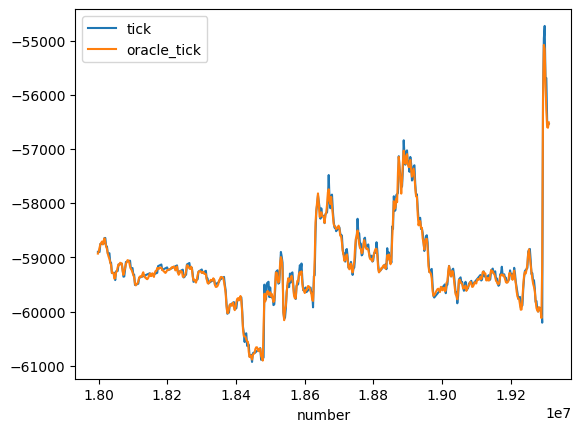

In [16]:
df.plot(x='number', y=['tick', 'oracle_tick'])

<Axes: xlabel='number'>

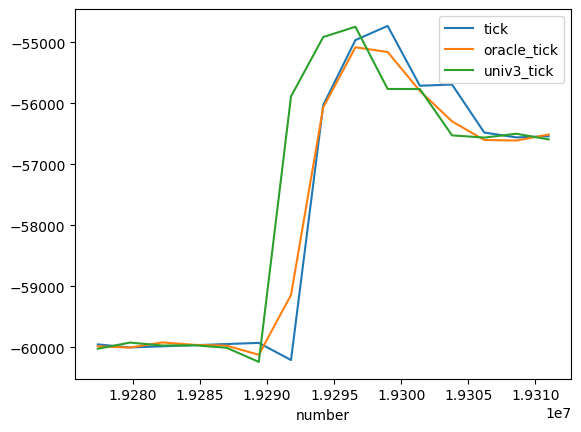

In [17]:
# zoom in to a 5 day window at end to see oracle tick timelag
# 12 hr TWAP lags so insurance mechanism for LPs must be robust to guarantee no bad debt
# have lag in marginal pool tick vs uni tick due to arbs only happening every step period
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['tick', 'oracle_tick', 'univ3_tick'])

In [18]:
# plot mrgl pool price vs oracle time weighted average price over time
def calc_price_from_tick(tick: int) -> float:
    return 1.0001 ** tick

In [19]:
df['price'] = df['tick'].apply(calc_price_from_tick)
df['price']

0      0.002768
1      0.002767
2      0.002767
3      0.002809
4      0.002809
         ...   
543    0.003807
544    0.003815
545    0.003526
546    0.003498
547    0.003505
Name: price, Length: 548, dtype: float64

In [20]:
df['oracle_price'] = df['oracle_tick'].apply(calc_price_from_tick)
df['oracle_price']

0      0.002759
1      0.002770
2      0.002789
3      0.002808
4      0.002815
         ...   
543    0.003775
544    0.003591
545    0.003484
546    0.003480
547    0.003515
Name: oracle_price, Length: 548, dtype: float64

In [21]:
df['univ3_price'] = df['univ3_tick'].apply(calc_price_from_tick)
df['univ3_price']

0      0.002768
1      0.002777
2      0.002809
3      0.002816
4      0.002822
         ...   
543    0.003787
544    0.003510
545    0.003497
546    0.003519
547    0.003487
Name: univ3_price, Length: 548, dtype: float64

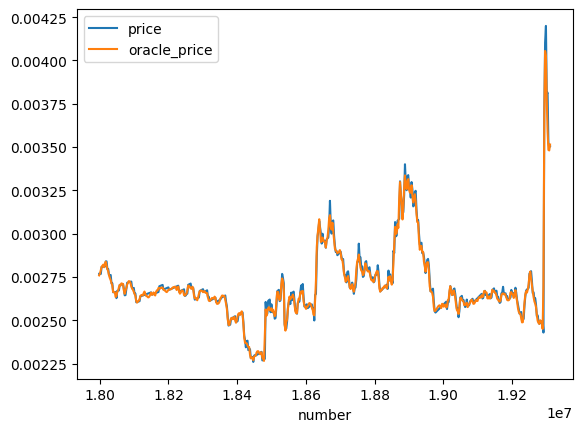

In [22]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-prices.png"
ax = df.plot(x='number', y=['price', 'oracle_price'])
ax.get_figure().savefig(fp)

<Axes: xlabel='number'>

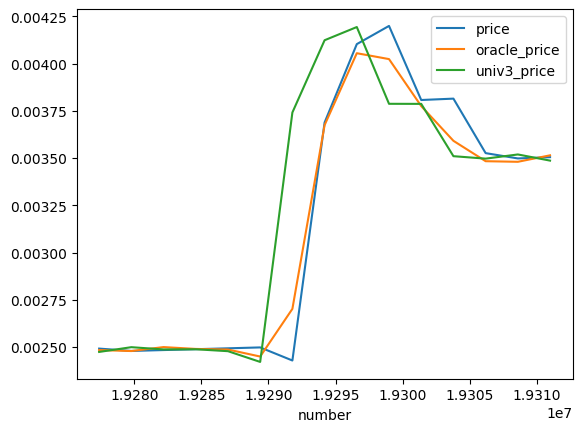

In [23]:
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['price', 'oracle_price', 'univ3_price'])

In [24]:
# show cumulative funding rates through blocks held
df.filter(['_funding_rates_outstanding0', '_funding_rates_outstanding1'])

,_funding_rates_outstanding0,_funding_rates_outstanding1
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000100,-0.000100
3,0.000650,-0.000650
4,0.000700,-0.000700
...,...,...
543,-0.002347,-0.006479
544,-0.002995,-0.005882
545,-0.006975,-0.001898
546,-0.007422,-0.001449


In [25]:
# plot liquidity gained over time. convert to datatype first
df['lp_total_liquidity'] = df['values3'].apply(lambda v: int(v))
df['lp_amount0'] = df['values4'].apply(lambda v: int(v))
df['lp_amount1'] = df['values5'].apply(lambda v: int(v))

In [26]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,_net_liquidity_position_fees_cumulative,tick,univ3_tick,oracle_tick,price,oracle_price,univ3_price,lp_total_liquidity,lp_amount0,lp_amount1
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,-58900,-58900,-58932,0.002768,0.002759,0.002768,10226805916623746957673,194397552620084053872985,538008621233460338723
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,327866112482406212,-58902,-58868,-58893,0.002767,0.002770,0.002777,10227202717944329718739,194420281185370240489050,537987471246382048461
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,327866112482406212,-58902,-58752,-58825,0.002767,0.002789,0.002809,10227221916382135166692,194420159535830044032550,537989827683743229027
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,327866112482406212,-58753,-58727,-58756,0.002809,0.002808,0.002816,10227357012524379229020,192979084667355752777740,542021595977263344813
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,327866112482406212,-58752,-58706,-58732,0.002809,0.002815,0.002822,10227497335619460180964,192978202156075131445261,542038948344561510703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,10803464094282245086,-55711,-55765,-55796,0.003807,0.003775,0.003787,14254316960361035241736,231022869515911293205274,879504061360653370914
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,10803464094282245086,-55692,-56524,-56295,0.003815,0.003591,0.003510,14264529660608596491322,230968115431020901552184,880973575329496784961
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,10803464094282245086,-56478,-56561,-56600,0.003526,0.003484,0.003497,14274969110714713768441,240399436717717524603356,847650667963653154723
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,10803464094282245086,-56558,-56498,-56609,0.003498,0.003480,0.003519,14285234964751694400445,241529575397048358309930,844898342833165849767


In [27]:
df['net_liquidity_settled_cumulative_zero_for_one'] = df['_net_liquidity_settled_cumulative0'].apply(lambda v: int(v))
df['net_liquidity_settled_cumulative_one_for_zero'] = df['_net_liquidity_settled_cumulative1'].apply(lambda v: int(v))
df['net_liquidity_settled_cumulative'] = df['net_liquidity_settled_cumulative_zero_for_one'] + df['net_liquidity_settled_cumulative_one_for_zero']

df['net_liquidity_liquidated_cumulative_zero_for_one'] = df['_net_liquidity_liquidated_cumulative0'].apply(lambda v: int(v))
df['net_liquidity_liquidated_cumulative_one_for_zero'] = df['_net_liquidity_liquidated_cumulative1'].apply(lambda v: int(v))
df['net_liquidity_liquidated_cumulative'] = df['net_liquidity_liquidated_cumulative_zero_for_one'] + df['net_liquidity_liquidated_cumulative_one_for_zero']

df['net_liquidity_swap_fees_cumulative'] = df['_net_liquidity_swap_fees_cumulative'].apply(lambda v: int(v))
df['net_liquidity_position_fees_cumulative'] = df['_net_liquidity_position_fees_cumulative'].apply(lambda v: int(v))
df['net_liquidity_fees_cumulative'] = df['net_liquidity_swap_fees_cumulative'] + df['net_liquidity_position_fees_cumulative']

In [28]:
df['net_liquidity_total_cumulative'] = df['lp_total_liquidity'] - df['lp_total_liquidity'].iloc[0]

In [29]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,net_liquidity_settled_cumulative_zero_for_one,net_liquidity_settled_cumulative_one_for_zero,net_liquidity_settled_cumulative,net_liquidity_liquidated_cumulative_zero_for_one,net_liquidity_liquidated_cumulative_one_for_zero,net_liquidity_liquidated_cumulative,net_liquidity_swap_fees_cumulative,net_liquidity_position_fees_cumulative,net_liquidity_fees_cumulative,net_liquidity_total_cumulative
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,0,0,0,0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,0,0,0,0,56581701727828008,327866112482406212,384447814210234220,396801320582761066
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,0,0,0,0,75780139533276148,327866112482406212,403646252015682360,415999758388209019
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,0,0,0,0,210876281777339797,327866112482406212,538742394259746009,551095900632271347
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,0,0,0,0,351199376858293113,327866112482406212,679065489340699325,691418995713223291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3554834574229818879934,10803464094282245086,3565638038324101125020,4027511043737288284063
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3565047274477380229382,10803464094282245086,3575850738571662474468,4037723743984849533649
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3575486724583497608581,10803464094282245086,3586290188677779853667,4048163194090966810768
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,26788584660120699508,15231375904881642011,42019960565002341519,345290478441133548404,74124980727251886049,419415459168385434453,3585752578620478340967,10803464094282245086,3596556042714760586053,4058429048127947442772


In [30]:
# put in yield terms relative to initial liquidity
df['lp_total_liquidity'].iloc[0]

10226805916623746957673

In [31]:
df['yield_liquidity_total'] = (df['lp_total_liquidity'] / df['lp_total_liquidity'].iloc[0] - 1)
df['yield_liquidity_fees'] = (df['net_liquidity_fees_cumulative'] / df['lp_total_liquidity'].iloc[0])
df['yield_liquidity_settled'] = (df['net_liquidity_settled_cumulative'] / df['lp_total_liquidity'].iloc[0])
df['yield_liquidity_liquidated'] = (df['net_liquidity_liquidated_cumulative'] / df['lp_total_liquidity'].iloc[0])

In [32]:
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,net_liquidity_liquidated_cumulative_one_for_zero,net_liquidity_liquidated_cumulative,net_liquidity_swap_fees_cumulative,net_liquidity_position_fees_cumulative,net_liquidity_fees_cumulative,net_liquidity_total_cumulative,yield_liquidity_total,yield_liquidity_fees,yield_liquidity_settled,yield_liquidity_liquidated
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,0,0,56581701727828008,327866112482406212,384447814210234220,396801320582761066,0.000039,0.000038,0.0,0.0
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,0,0,75780139533276148,327866112482406212,403646252015682360,415999758388209019,0.000041,0.000039,0.0,0.0
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,0,0,210876281777339797,327866112482406212,538742394259746009,551095900632271347,0.000054,0.000053,0.0,0.0
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,0,0,351199376858293113,327866112482406212,679065489340699325,691418995713223291,0.000068,0.000066,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,74124980727251886049,419415459168385434453,3554834574229818879934,10803464094282245086,3565638038324101125020,4027511043737288284063,0.393819,0.348656,0.004109,0.041011
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,74124980727251886049,419415459168385434453,3565047274477380229382,10803464094282245086,3575850738571662474468,4037723743984849533649,0.394818,0.349655,0.004109,0.041011
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,74124980727251886049,419415459168385434453,3575486724583497608581,10803464094282245086,3586290188677779853667,4048163194090966810768,0.395838,0.350675,0.004109,0.041011
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,74124980727251886049,419415459168385434453,3585752578620478340967,10803464094282245086,3596556042714760586053,4058429048127947442772,0.396842,0.351679,0.004109,0.041011


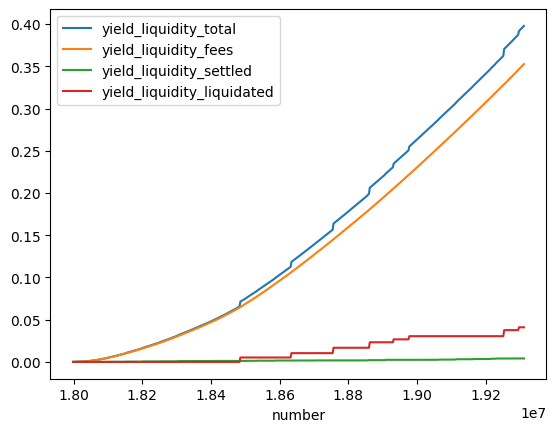

In [33]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields.png"
ax = df.plot(x='number', y=['yield_liquidity_total', 'yield_liquidity_fees', 'yield_liquidity_settled', 'yield_liquidity_liquidated'])
ax.get_figure().savefig(fp)

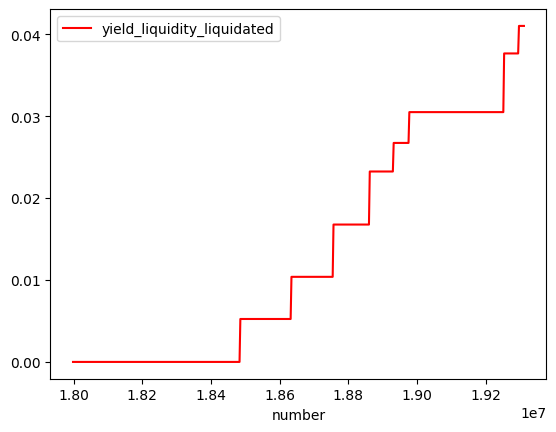

In [34]:
# look at net liquidity liquidated over time and check no shortfalls due to liquidations (i.e. no bad debt)
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-liquidated.png"
ax = df.plot(x='number', y=['yield_liquidity_liquidated'], color=['r'])
ax.get_figure().savefig(fp)

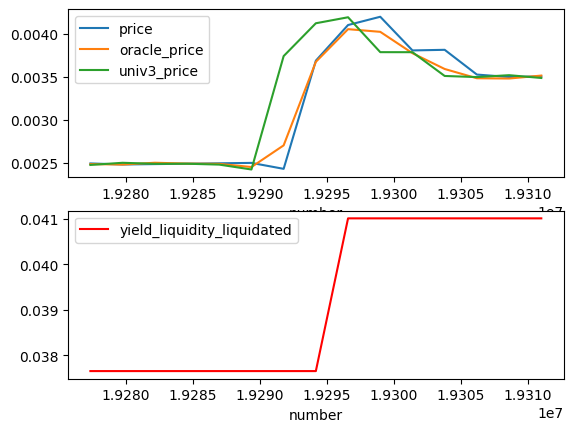

In [35]:
# focus on last 5 day window ...
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-price_vs_liquidations_yield_T-5.png"
fig, ax = plt.subplots(2, 1)
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['price', 'oracle_price', 'univ3_price'], ax=ax[0])
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['yield_liquidity_liquidated'], color=['r'], ax=ax[1])
fig.savefig(fp)

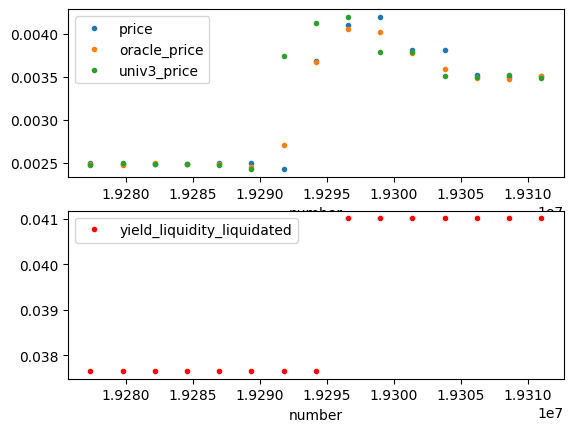

In [36]:
# focus on last 5 day window with dots to be sure ...
# liquidation happens when prices at highest tick, and closest for uni/weth pools: all prices around 0.004 ETH / UNI

# @dev note that `runner::update_strategy` called *after* query on `backtester::values()`: @smolquants/backtest-ape/backtest_ape/base.py#L309
#      in same number iteration. so arbs and liquidations recorded at same `tick` as `values()` query.
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-price_vs_liquidations_yield_T-5_dots.png"
fig, ax = plt.subplots(2, 1)
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['price', 'oracle_price', 'univ3_price'], ax=ax[0], style=['.', '.', '.'])
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].plot(x='number', y=['yield_liquidity_liquidated'], color=['r'], ax=ax[1], style=['.'])
fig.savefig(fp)

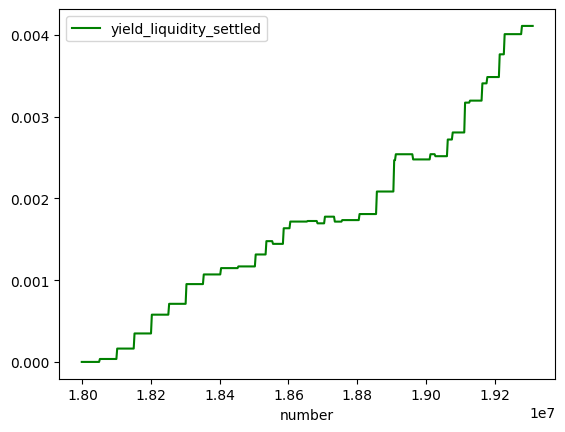

In [37]:
# and for settled? dependent on funding rates. order of mag smaller than contribution from liquidations
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-settled.png"
ax = df.plot(x='number', y=['yield_liquidity_settled'], color=['g'])
ax.get_figure().savefig(fp)

In [38]:
def calc_reserves_from_liquidity_sqrt_price_x96(sqrt_price_x96: int, liquidity: int) -> (int, int):
    amount0 = (int(liquidity) << 96) // int(sqrt_price_x96)
    amount1 = (int(liquidity) * int(sqrt_price_x96)) // (1 << 96)
    return (amount0, amount1)

In [39]:
# check actual token balances in the pool can cover pool liquidity post-settle, liquidate of outstanding positions
df['balance0_pool'] = df['_balances_pool0'].apply(lambda v: int(v))
df['balance1_pool'] = df['_balances_pool1'].apply(lambda v: int(v))

In [40]:
df["liquidity"] = df["values0"].apply(lambda v: int(v))
df["sqrtPriceX96"] = df["values1"].apply(lambda v: int(v))

In [41]:
df['reserve0'] = df.apply(lambda x: calc_reserves_from_liquidity_sqrt_price_x96(x.sqrtPriceX96, x.liquidity)[0], axis=1)
df['reserve1'] = df.apply(lambda x: calc_reserves_from_liquidity_sqrt_price_x96(x.sqrtPriceX96, x.liquidity)[1], axis=1)

In [42]:
df['amounts0_locked_zero_for_one'] = df['_amounts0_locked0'].apply(lambda v: int(v))
df['amounts1_locked_zero_for_one'] = df['_amounts1_locked0'].apply(lambda v: int(v))
df['amounts0_locked_one_for_zero'] = df['_amounts0_locked1'].apply(lambda v: int(v))
df['amounts1_locked_one_for_zero'] = df['_amounts1_locked1'].apply(lambda v: int(v))

In [43]:
df['collaterals_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v)) + df['_margins_outstanding0'].apply(lambda v: int(v))
df['debts_zero_for_one'] = df['_debts_outstanding0'].apply(lambda v: int(v))
df['collaterals_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v)) + df['_margins_outstanding1'].apply(lambda v: int(v))
df['debts_one_for_zero'] = df['_debts_outstanding1'].apply(lambda v: int(v))

In [44]:
df['reserve0_liquidated'] = df['reserve0'] + df['amounts0_locked_zero_for_one'] + df['amounts0_locked_one_for_zero']
df['reserve1_liquidated'] = df['reserve1'] + df['amounts1_locked_zero_for_one'] + df['amounts1_locked_one_for_zero']

In [45]:
df.filter(['reserve0_liquidated', 'balance0_pool', 'reserve1_liquidated', 'balance1_pool'])

,reserve0_liquidated,balance0_pool,reserve1_liquidated,balance1_pool
0,194397552620085954736958,0,538008621233465599495,0
1,194065277576750292549339,194065277576750292549332,552889053808695116364,552889053808695116370
2,194065277576750292549339,194065277576750292549332,552891073624321598789,552891073624321598797
3,192985096945523816945441,192985096945523816945434,555916722557499230712,555916722557499230723
4,192985096945523816945441,192985096945523816945434,555931596164344408787,555931596164344408800
...,...,...,...,...
543,234087237071982364276397,234087237071982364276301,906808341660800535258,906808341660800536817
544,234087237071982364276397,234087237071982364276301,908069208032173491072,908069208032173492635
545,241217886504282448403316,241217886504282448403220,883183568518296887048,883183568518296888614
546,242110422168870778712381,242110422168870778712285,881265713426966210558,881265713426966212129


In [46]:
# should be some dust left over in pool or very little negative amounts (won't be stuck due to transfer helper lib)
df['net_balance0_pool'] = df['balance0_pool'] - df['reserve0_liquidated']
df['net_balance1_pool'] = df['balance1_pool'] - df['reserve1_liquidated']

In [47]:
df['rel_balance0_pool'] = df['net_balance0_pool'] / df['reserve0_liquidated']
df['rel_balance1_pool'] = df['net_balance1_pool'] / df['reserve1_liquidated']

In [48]:
# dust for balance check
df.filter(['net_balance0_pool', 'net_balance1_pool', 'rel_balance0_pool', 'rel_balance1_pool'])

,net_balance0_pool,net_balance1_pool,rel_balance0_pool,rel_balance1_pool
0,-194397552620085954736958,-538008621233465599495,-1.0,-1.0
1,-7,6,-0.0,0.0
2,-7,8,-0.0,0.0
3,-7,11,-0.0,0.0
4,-7,13,-0.0,0.0
...,...,...,...,...
543,-96,1559,-0.0,0.0
544,-96,1563,-0.0,0.0
545,-96,1566,-0.0,0.0
546,-96,1571,-0.0,0.0


In [49]:
print(f"last excess reserves (relative): {(df['rel_balance0_pool'].iloc[-1], df['rel_balance1_pool'].iloc[-1])}")

last excess reserves (relative): (-3.965132898452446e-22, 1.782477553579814e-18)


<Axes: xlabel='number'>

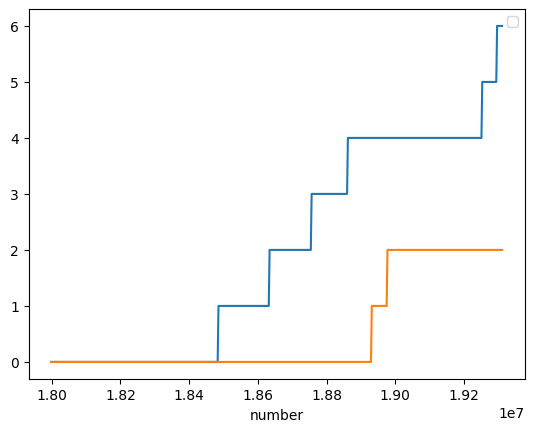

In [50]:
df.plot(x='number', y=['_positions_liquidated_cumulative0', '_positions_liquidated_cumulative1'])

In [51]:
df['sizes_outstanding_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v))
df['sizes_outstanding_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v))

In [52]:
# relative to initial total liquidity x, y amounts
df['rel_sizes_outstanding_zero_for_one'] = df['sizes_outstanding_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_outstanding_one_for_zero'] = df['sizes_outstanding_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0

<Axes: xlabel='number'>

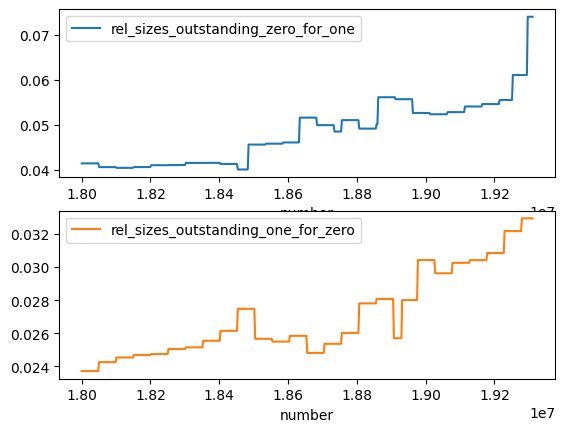

In [53]:
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['rel_sizes_outstanding_zero_for_one'], ax=ax[0], color=['C0'])
df[1:].plot(x='number', y=['rel_sizes_outstanding_one_for_zero'], ax=ax[1], color=['C1'])

In [54]:
df['sizes_liquidated_cumulative_zero_for_one'] = df['_sizes_liquidated_cumulative0'].apply(lambda v: int(v))
df['sizes_liquidated_cumulative_one_for_zero'] = df['_sizes_liquidated_cumulative1'].apply(lambda v: int(v))
df['sizes_settled_cumulative_zero_for_one'] = df['_sizes_settled_cumulative0'].apply(lambda v: int(v))
df['sizes_settled_cumulative_one_for_zero'] = df['_sizes_settled_cumulative1'].apply(lambda v: int(v))

In [55]:
# relative to initial total liquidity x, y amounts
df['rel_sizes_liquidated_cumulative_zero_for_one'] = df['sizes_liquidated_cumulative_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_liquidated_cumulative_one_for_zero'] = df['sizes_liquidated_cumulative_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0
df['rel_sizes_settled_cumulative_zero_for_one'] = df['sizes_settled_cumulative_zero_for_one'] / df['lp_amount1'].iloc[0]  # size in token1
df['rel_sizes_settled_cumulative_one_for_zero'] = df['sizes_settled_cumulative_one_for_zero'] / df['lp_amount0'].iloc[0]  # size in token0

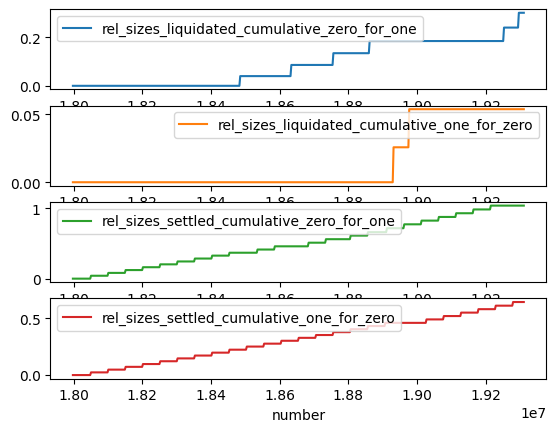

In [56]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel-sizes-liquidated-settled.png"
fig, ax = plt.subplots(4, 1)
df.plot(x='number', y=['rel_sizes_liquidated_cumulative_zero_for_one'], ax=ax[0], color='C0')
df.plot(x='number', y=['rel_sizes_liquidated_cumulative_one_for_zero'], ax=ax[1], color='C1')
df.plot(x='number', y=['rel_sizes_settled_cumulative_zero_for_one'], ax=ax[2], color='C2')
df.plot(x='number', y=['rel_sizes_settled_cumulative_one_for_zero'], ax=ax[3], color='C3')
fig.savefig(fp)

In [57]:
# examine yields in token0 or token1 terms ...
df['lp_value0_total'] = (2 * df['lp_total_liquidity'] * (1 << 96)) // df['sqrtPriceX96']
df['lp_value1_total'] = (2 * df['lp_total_liquidity'] * df['sqrtPriceX96']) // (1 << 96)

In [58]:
df['yield_value0_total'] = df['lp_value0_total'] / df['lp_value0_total'].iloc[0] - 1
df['yield_value1_total'] = df['lp_value1_total'] / df['lp_value1_total'].iloc[0] - 1

In [59]:
df.filter(['lp_value0_total', 'lp_value1_total', 'yield_value0_total', 'yield_value1_total'])

,lp_value0_total,lp_value1_total,yield_value0_total,yield_value1_total
0,388795105240168107745971,1076017242466920677447,0.0,0.0
1,388840562370740480978100,1075974942492764096923,0.000117,-0.000039
2,388840319071660088065101,1075979655367486458054,0.000116,-0.000035
3,385958169334711505555480,1084043191954526689626,-0.007297,0.007459
4,385956404312150262890522,1084077896689123021406,-0.007301,0.007491
...,...,...,...,...
543,462045739031822586410548,1759008122721306741828,0.188404,0.63474
544,461936230862041803104369,1761947150658993569922,0.188123,0.637471
545,480798873435435049206713,1695301335927306309447,0.236638,0.575534
546,483059150794096716619861,1689796685666331699534,0.242452,0.570418


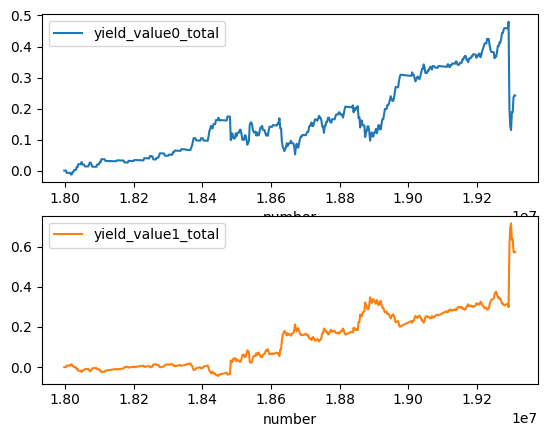

In [60]:
# yield in value terms ...
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-value.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['yield_value0_total'], ax=ax[0], color='C0')
df.plot(x='number', y=['yield_value1_total'], ax=ax[1], color='C1')
fig.savefig(fp)

In [61]:
# benchmark against passive hold ...
df['passive_value0_total'] = df['lp_amount0'].iloc[0] + df['lp_amount1'].iloc[0] / df['price']
df['passive_value1_total'] = df['lp_amount0'].iloc[0] * df['price'] + df['lp_amount1'].iloc[0]

In [62]:
df['yield_value0_total_lp_to_passive'] = df['lp_value0_total'] / df['passive_value0_total'] - 1
df['yield_value1_total_lp_to_passive'] = df['lp_value1_total'] / df['passive_value1_total'] - 1

df['yield_value0_total_lp_to_passive'] = df['lp_value0_total'] / df['passive_value0_total'] - 1
df['yield_value1_total_lp_to_passive'] = df['lp_value1_total'] / df['passive_value1_total'] - 1

In [63]:
df.filter(['passive_value0_total', 'passive_value1_total', 'yield_value0_total_lp_to_passive', 'yield_value1_total_lp_to_passive'])

,passive_value0_total,passive_value1_total,yield_value0_total_lp_to_passive,yield_value1_total_lp_to_passive
0,388779461286455238721536.0,1076060541671180337152.0,0.00004,-0.00004
1,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.00002
2,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.000025
3,385943087466229983608832.0,1084027923329422852096.0,0.000039,0.000014
4,385923934828009290203136.0,1084082525259632476160.0,0.000084,-0.000004
...,...,...,...,...
543,335705392094657225162752.0,1278148443943790968832.0,0.376343,0.376216
544,335437175496714498342912.0,1279555975963520008192.0,0.377117,0.376999
545,346969601244264256241664.0,1223504819255376871424.0,0.385709,0.385611
546,348195011469480808153088.0,1218042999166231642112.0,0.387324,0.387305


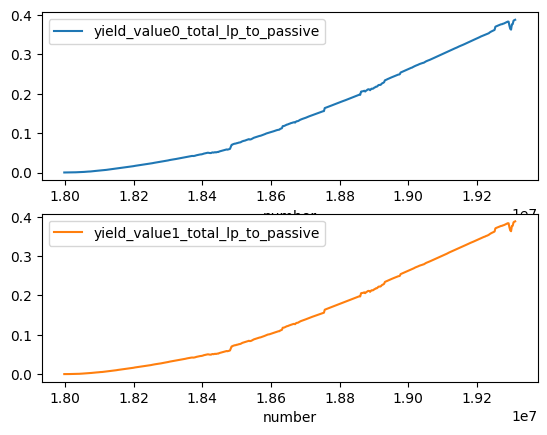

In [64]:
# similar yield increases to liquidity terms but with differences due to IL
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-value-rel-to-passive.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['yield_value0_total_lp_to_passive'], ax=ax[0], color='C0')
df.plot(x='number', y=['yield_value1_total_lp_to_passive'], ax=ax[1], color='C1')
fig.savefig(fp)

In [65]:
# yield loss to impermanent loss
def calc_impermanent_loss(sqrt_ratio: float) -> float:
    return (2 * sqrt_ratio) / (sqrt_ratio **2 + 1) - 1

In [66]:
sqrt_ratio_end = df['sqrtPriceX96'].iloc[-1] / df['sqrtPriceX96'].iloc[0]
calc_impermanent_loss(sqrt_ratio_end)

-0.0069314210153238465

In [67]:
# plot IL (approx)
df['yield_il'] = df['yield_value1_total_lp_to_passive'] - df['yield_liquidity_total']

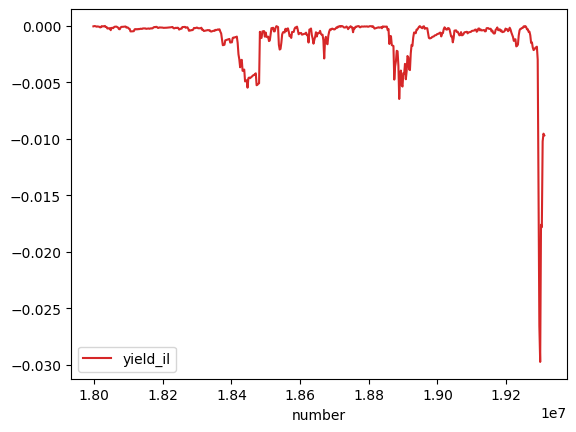

In [68]:
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-yields-il.png"
ax = df.plot(x='number', y=['yield_il'], color='C3')
ax.get_figure().savefig(fp)

In [69]:
# check out total volumes on both sides (count based at settlement/liquidation given columns)
df['rel_volumes_closed_cumulative_zero_for_one'] = df['rel_sizes_liquidated_cumulative_zero_for_one'] + df['rel_sizes_settled_cumulative_zero_for_one']
df['rel_volumes_closed_cumulative_one_for_zero'] = df['rel_sizes_liquidated_cumulative_one_for_zero'] + df['rel_sizes_settled_cumulative_one_for_zero']

In [70]:
df.filter(['rel_volumes_closed_cumulative_zero_for_one', 'rel_volumes_closed_cumulative_one_for_zero'])

,rel_volumes_closed_cumulative_zero_for_one,rel_volumes_closed_cumulative_one_for_zero
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
543,1.341475,0.697903
544,1.341475,0.697903
545,1.341475,0.697903
546,1.341475,0.697903


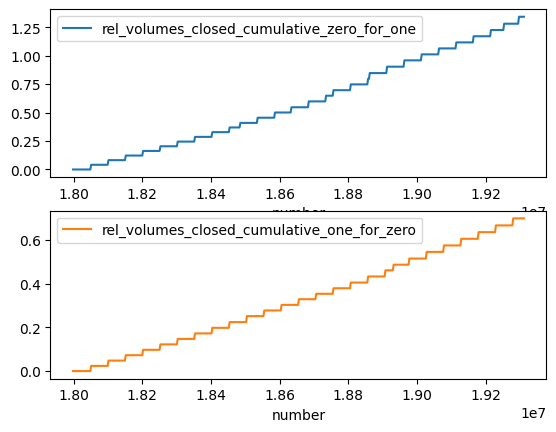

In [71]:
# cumulative volumes relative to initial TVL
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel_volumes_cumulative.png"
fig, ax = plt.subplots(2, 1)
df.plot(x='number', y=['rel_volumes_closed_cumulative_zero_for_one'], ax=ax[0], color='C0')
df.plot(x='number', y=['rel_volumes_closed_cumulative_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

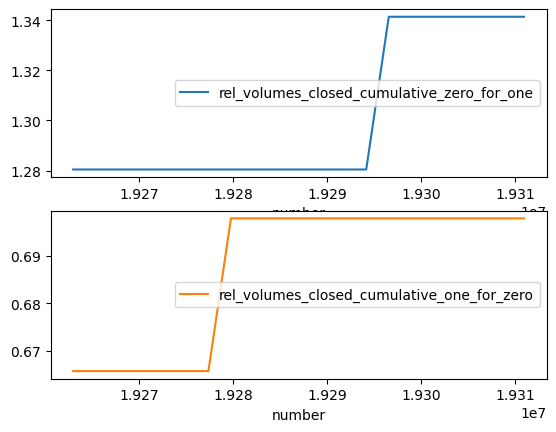

In [72]:
# zoom in over last blocks held period for sim to show turn over
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-rel_volumes_cumulative_T-blocks_held.png"
fig, ax = plt.subplots(2, 1)
df[df['timestamp'] > df['timestamp'].iloc[-1] - 12 * blocks_held].plot(x='number', y=['rel_volumes_closed_cumulative_zero_for_one'], ax=ax[0], color='C0')
df[df['timestamp'] > df['timestamp'].iloc[-1] - 12 * blocks_held].plot(x='number', y=['rel_volumes_closed_cumulative_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

In [73]:
# calculate slippage amounts paid by traders on opened positions
df

,number,timestamp,values0,values1,values2,values3,values4,values5,univ3_sqrtPriceX96,univ3_liquidity,...,lp_value1_total,yield_value0_total,yield_value1_total,passive_value0_total,passive_value1_total,yield_value0_total_lp_to_passive,yield_value1_total_lp_to_passive,yield_il,rel_volumes_closed_cumulative_zero_for_one,rel_volumes_closed_cumulative_one_for_zero
0,17998182,1708998584,10226805916623846957733,4168010503442910833875654129,0,10226805916623746957673,194397552620084053872985,538008621233460338723,4168008784382137638332327128,1348756457373625844877604,...,1076017242466920677447,0.0,0.0,388779461286455238721536.0,1076060541671180337152.0,0.00004,-0.00004,-0.00004,0.0,0.0
1,18000582,1708998588,7670480545305599283587,4167684945538446847935294040,2556722172638830439092,10227202717944329718739,194420281185370240489050,537987471246382048461,4174832966775960060884034990,1348756457373625844877604,...,1075974942492764096923,0.000117,-0.000039,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.00002,-0.000018,0.0,0.0
2,18002982,1709027524,7670499743743404731727,4167695376832776717667634751,2556722172638830439092,10227221916382135166692,194420159535830044032550,537989827683743229027,4198939390493444764294405442,1714990638571862423866014,...,1075979655367486458054,0.000116,-0.000035,388818339612007558283264.0,1075952947426498445312.0,0.000057,0.000025,-0.000016,0.0,0.0
3,18005382,1709056461,7670634839885648795376,4198873182948367358091477799,2556722172638830439092,10227357012524379229020,192979084667355752777740,542021595977263344813,4204231089501474711675342148,1665958413176292228814096,...,1084043191954526689626,-0.007297,0.007459,385943087466229983608832.0,1084027923329422852096.0,0.000039,0.000014,-0.00004,0.0,0.0
4,18007782,1709085433,7670775162980729748692,4198949995219213575614747188,2556722172638830439092,10227497335619460180964,192978202156075131445261,542038948344561510703,4208681782476437507208844991,1665958413176292228814096,...,1084077896689123021406,-0.007301,0.007491,385923934828009290203136.0,1084082525259632476160.0,0.000084,-0.000004,-0.000072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,19301382,1724752468,10708538681596057067296,4888448243378506796571728060,3545778278765117556428,14254316960361035241736,231022869515911293205274,879504061360653370914,4875301928444821867630628907,323976533130863515655856,...,1759008122721306741828,0.188404,0.63474,335705392094657225162752.0,1278148443943790968832.0,0.376343,0.376216,-0.017603,1.341475,0.697903
544,19303782,1724781441,10718751381843618416744,4893110341361226278681782922,3545778278765117556428,14264529660608596491322,230968115431020901552184,880973575329496784961,4693924590733693082295585449,326421624029424835360987,...,1761947150658993569922,0.188123,0.637471,335437175496714498342912.0,1279555975963520008192.0,0.377117,0.376999,-0.017819,1.341475,0.697903
545,19306182,1724810462,10729190831949735795943,4704584952575536598475887701,3545778278765117556428,14274969110714713768441,240399436717717524603356,847650667963653154723,4685171427703644151759713962,327016644406246453261884,...,1695301335927306309447,0.236638,0.575534,346969601244264256241664.0,1223504819255376871424.0,0.385709,0.385611,-0.010228,1.341475,0.697903
546,19308582,1724839423,10739456685986716528329,4685939249805138538309078131,3545778278765117556428,14285234964751694400445,241529575397048358309930,844898342833165849767,4699914448871631640965677056,328647811298964781266544,...,1689796685666331699534,0.242452,0.570418,348195011469480808153088.0,1218042999166231642112.0,0.387324,0.387305,-0.009538,1.341475,0.697903


In [74]:
df['sizes_zero_for_one'] = df['_sizes_outstanding0'].apply(lambda v: int(v))
df['sizes_one_for_zero'] = df['_sizes_outstanding1'].apply(lambda v: int(v))
df['margins_zero_for_one'] = df['_margins_outstanding0'].apply(lambda v: int(v))
df['margins_one_for_zero'] = df['_margins_outstanding1'].apply(lambda v: int(v))

In [75]:
df.filter(['sizes_zero_for_one', 'debts_zero_for_one', 'margins_zero_for_one', 'sizes_one_for_zero', 'debts_one_for_zero', 'margins_one_for_zero', 'price'])

,sizes_zero_for_one,debts_zero_for_one,margins_zero_for_one,sizes_one_for_zero,debts_one_for_zero,margins_one_for_zero,price
0,0,0,0,0,0,0,0.002768
1,22263477407769042444,8391674788789819579198,8905390963107616768,4610960797143788102297,12052247400151771431,1844384318857515106304,0.002767
2,22263477407769042444,8392513956268698561155,8905390963107616768,4610960797143788102297,12051042295922179213,1844384318857515106304,0.002767
3,22263477407769042444,8397130877639422927019,8905390963107616768,4610960797143788102297,12044416376244815874,1844384318857515106304,0.002809
4,22263477407769042444,8397550723687416088997,8905390963107616768,4610960797143788102297,12043814200588801493,1844384318857515106304,0.002809
...,...,...,...,...,...,...,...
543,39831818752404394207,9721857809957798791891,15932727500961759232,6403869738367077358624,16416239232151874312,2561547895346831032320,0.003807
544,39831818752404394207,9715540971412911022662,15932727500961759232,6403869738367077358624,16426091438455399669,2561547895346831032320,0.003815
545,39831818752404394207,9676758363548608671280,15932727500961759232,6403869738367077358624,16491924090162450830,2561547895346831032320,0.003526
546,39831818752404394207,9672405019524449843017,15932727500961759232,6403869738367077358624,16499346754850278343,2561547895346831032320,0.003498


In [76]:
# pnl on open position is (size / (debt * price) - 1) for zeroForOne = true and (size * price / debt - 1) for zeroForOne = false
def pnl(x) -> (float, float):
    if x.margins_zero_for_one == 0 or x.margins_one_for_zero == 0:
            return (0, 0)
    p01 = (x.margins_zero_for_one + (x.sizes_zero_for_one - x.debts_zero_for_one * x.price)) / x.margins_zero_for_one - 1
    p10 = (x.margins_one_for_zero + (x.sizes_one_for_zero - x.debts_one_for_zero / x.price)) / x.margins_one_for_zero - 1
    return (p01, p10)

In [77]:
# pnl based on univ3 price on open position is (size / (debt * price) - 1) for zeroForOne = true and (size * price / debt - 1) for zeroForOne = false
# arb at start of update_strategy should bring mrgl pool to this price before liquidations/settlement
def pnl_univ3(x) -> (float, float):
    if x.margins_zero_for_one == 0 or x.margins_one_for_zero == 0:
            return (0, 0)
    p01 = (x.margins_zero_for_one + (x.sizes_zero_for_one - x.debts_zero_for_one * x.univ3_price)) / x.margins_zero_for_one - 1
    p10 = (x.margins_one_for_zero + (x.sizes_one_for_zero - x.debts_one_for_zero / x.univ3_price)) / x.margins_one_for_zero - 1
    return (p01, p10)

In [78]:
def effective_leverage(x) -> (float, float):
    if x.margins_zero_for_one == 0 or x.margins_one_for_zero == 0:
            return (0, 0)
    l01 = (x.margins_zero_for_one + x.debts_zero_for_one * x.price) / x.margins_zero_for_one
    l10 = (x.margins_one_for_zero + x.debts_one_for_zero / x.price) / x.margins_one_for_zero
    return (l01, l10)

In [79]:
leverage

3.5

In [80]:
# check should be = leverage - 1 if leverage was user input
df[1:]['sizes_zero_for_one'] / df[1:]['margins_zero_for_one']

1      2.5
2      2.5
3      2.5
4      2.5
5      2.5
      ... 
543    2.5
544    2.5
545    2.5
546    2.5
547    2.5
Length: 547, dtype: object

In [81]:
df[1:]['sizes_one_for_zero'] / df[1:]['margins_one_for_zero']

1      2.5
2      2.5
3      2.5
4      2.5
5      2.5
      ... 
543    2.5
544    2.5
545    2.5
546    2.5
547    2.5
Length: 547, dtype: object

In [82]:
df['pnl_zero_for_one'] = df.apply(lambda x: pnl(x)[0], axis=1)
df['pnl_one_for_zero'] = df.apply(lambda x: pnl(x)[1], axis=1)

df['pnl_univ3_zero_for_one'] = df.apply(lambda x: pnl_univ3(x)[0], axis=1)
df['pnl_univ3_one_for_zero'] = df.apply(lambda x: pnl_univ3(x)[1], axis=1)

df['effective_leverage_zero_for_one'] = df.apply(lambda x: effective_leverage(x)[0], axis=1)
df['effective_leverage_one_for_zero'] = df.apply(lambda x: effective_leverage(x)[1], axis=1)

In [83]:
df.filter(['pnl_zero_for_one', 'pnl_one_for_zero', 'pnl_univ3_zero_for_one', 'pnl_univ3_one_for_zero', 'effective_leverage_zero_for_one', 'effective_leverage_one_for_zero'])

,pnl_zero_for_one,pnl_one_for_zero,pnl_univ3_zero_for_one,pnl_univ3_one_for_zero,effective_leverage_zero_for_one,effective_leverage_one_for_zero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.107607,0.138597,-0.116488,0.146612,3.607607,3.361403
2,-0.107868,0.138833,-0.147279,0.173985,3.607868,3.361167
3,-0.148470,0.175031,-0.155365,0.181068,3.648470,3.324969
4,-0.148868,0.175380,-0.161080,0.186048,3.648868,3.324620
...,...,...,...,...,...,...
543,0.176824,0.816752,0.189335,0.807638,3.323176,2.683248
544,0.173918,0.818938,0.359607,0.673098,3.326082,2.681062
545,0.358323,0.674194,0.376024,0.658978,3.141677,2.825806
546,0.376343,0.658702,0.363563,0.669716,3.123657,2.841298


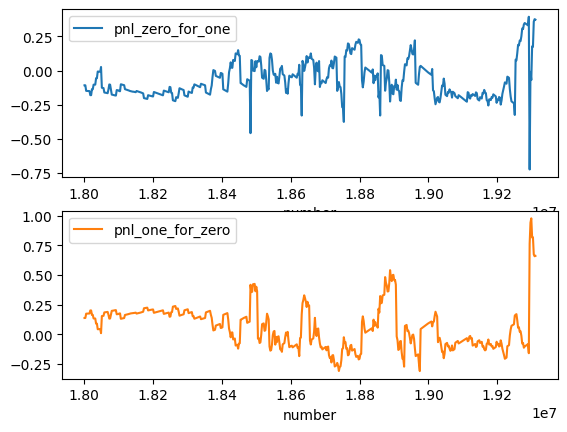

In [84]:
# pnl paid out to positions relative to initial margin
# compared with net liquidity gains from settlement show safety for pool LPs due to physical settlement
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-position_pnl.png"
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['pnl_zero_for_one'], ax=ax[0], color='C0')
df[1:].plot(x='number', y=['pnl_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

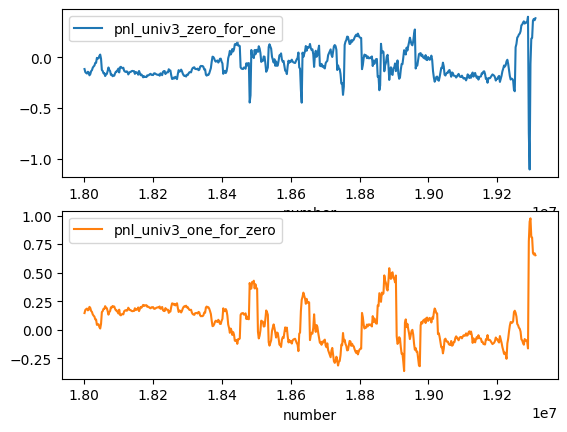

In [85]:
# pnl paid out to positions relative to initial margin based on univ3 price (arb'd to at start of update strategy)
# compared with net liquidity gains from settlement show safety for pool LPs due to physical settlement
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-position_pnl_univ3.png"
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['pnl_univ3_zero_for_one'], ax=ax[0], color='C0')
df[1:].plot(x='number', y=['pnl_univ3_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

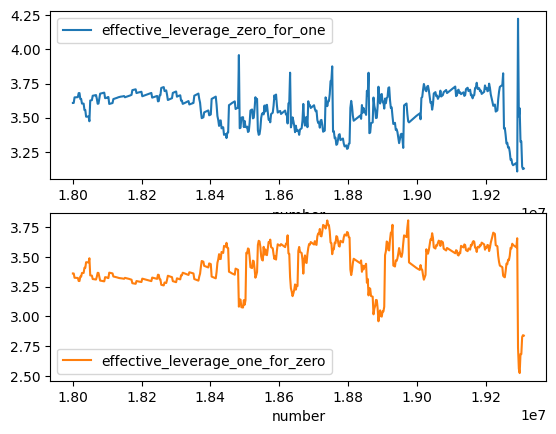

In [86]:
# effective leverage on positions relative to initial margin accounting for slippage increases to debt
fp = "assets/" + FILEPATH[len("results/"):-len(".csv")] + "-position_effective_leverage.png"
fig, ax = plt.subplots(2, 1)
df[1:].plot(x='number', y=['effective_leverage_zero_for_one'], ax=ax[0], color='C0')
df[1:].plot(x='number', y=['effective_leverage_one_for_zero'], ax=ax[1], color='C1')
fig.savefig(fp)

In [87]:
# return to last 5 day window with dots again to check pnl ...
# liquidation happens when prices at highest tick, and closest for uni/weth pools: all prices around 0.004 ETH / UNI

# @dev note that `runner::update_strategy` called after query on `backtester::values()`: @smolquants/backtest-ape/backtest_ape/base.py#L309
#      in same number iteration. so arbs and liquidations recorded at same `tick` as `values()` query, but using closest to univ3 price
#      as the mrgl v1 pool gets arb'd to univ3 ref state at beginning of update strategy call, but values won't change until next iteration.
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400].filter(['price', 'oracle_price', 'univ3_price', 'yield_liquidity_liquidated', 'pnl_zero_for_one', 'pnl_univ3_zero_for_one', 'pnl_one_for_zero', 'pnl_univ3_one_for_zero'])

,price,oracle_price,univ3_price,yield_liquidity_liquidated,pnl_zero_for_one,pnl_univ3_zero_for_one,pnl_one_for_zero,pnl_univ3_one_for_zero
533,0.002492,0.002484,0.002474,0.037652,0.337213,0.352514,-0.111736,-0.130344
534,0.002479,0.002479,0.002499,0.037652,0.348000,0.330715,-0.101540,-0.080812
535,0.002484,0.002500,0.002487,0.037652,0.344015,0.341211,-0.096602,-0.093229
536,0.002489,0.002490,0.002488,0.037652,0.339159,0.339375,-0.090896,-0.091156
537,0.002493,0.002487,0.002478,0.037652,0.335158,0.348322,-0.086108,-0.101931
538,0.002498,0.002450,0.002421,0.037652,0.331149,0.397769,-0.081328,-0.163131
539,0.002429,0.002702,0.003741,0.037652,0.393772,-0.744228,-0.157943,0.774401
540,0.003688,0.003675,0.004124,0.037652,-0.723854,-1.104460,0.763496,0.946859
541,0.004103,0.004055,0.004193,0.041011,-0.009495,-0.064799,0.941881,0.975479
542,0.004199,0.004024,0.003787,0.041011,-0.069163,0.182972,0.978068,0.812454


In [88]:
# notice, for UNI/WETH sim, liquidation would have happened *below* the bankruptcy price as 
# pnl_univ3_zero_for_one == -1.104460 at this point, but won't happen until next block as oracle_price is still
# lagging (can't arb this). encouragingly, the mrgl pool still *gains* liquidity due to the insurance mechanism even
# tho the instantaneous price at which the outstanding position was liquidated on the pool was *below* the position
# bankruptcy price.

In [89]:
df[df['timestamp'] > df['timestamp'].iloc[-1] - 5 * 86400]['yield_liquidity_liquidated'].diff()

533         NaN
534         0.0
535         0.0
536         0.0
537         0.0
538         0.0
539         0.0
540         0.0
541    0.003359
542         0.0
543         0.0
544         0.0
545         0.0
546         0.0
547         0.0
Name: yield_liquidity_liquidated, dtype: object